In [1]:
# 데이터 살펴보기

from tensorflow.keras.datasets import fashion_mnist

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9

# 0~59999의 범위에서 무작위로 세 개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size)

# 0~1 범위로 만듭니다.
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))


from tensorflow.keras.utils import to_categorical
# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split
# 학습/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

print('Fashin-MNIST ready~')
print(x_train.shape, y_train.shape)

Fashin-MNIST ready~
(42000, 28, 28, 1) (42000, 10)


In [2]:
# 모델 구성하기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same',
           activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=2, padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\human\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# 모델 학습시키기

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

model.fit(x_train, y_train, epochs = 30, batch_size = 128, validation_data = (x_val, y_val))

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - acc: 0.6371 - loss: 1.0160 - val_acc: 0.8540 - val_loss: 0.4161
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.8520 - loss: 0.4124 - val_acc: 0.8728 - val_loss: 0.3527
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - acc: 0.8694 - loss: 0.3571 - val_acc: 0.8755 - val_loss: 0.3498
Epoch 4/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.8876 - loss: 0.3100 - val_acc: 0.8832 - val_loss: 0.3148
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.8971 - loss: 0.2843 - val_acc: 0.8951 - val_loss: 0.2964
Epoch 6/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.8951 - loss: 0.2835 - val_acc: 0.9008 - val_loss: 0.2796
Epoch 7/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9036 - loss: 0.2645 - val_acc: 0.8952 - val_loss: 0.2928
Epoch 8/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - acc: 0.9102 - loss: 0.2479 - val_acc: 0.9061 - val_loss: 0.2680
Epoch 9/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 268,640 (1.02 MB)

 Trainable params: 89,546 (349.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 179,094 (699.59 KB)

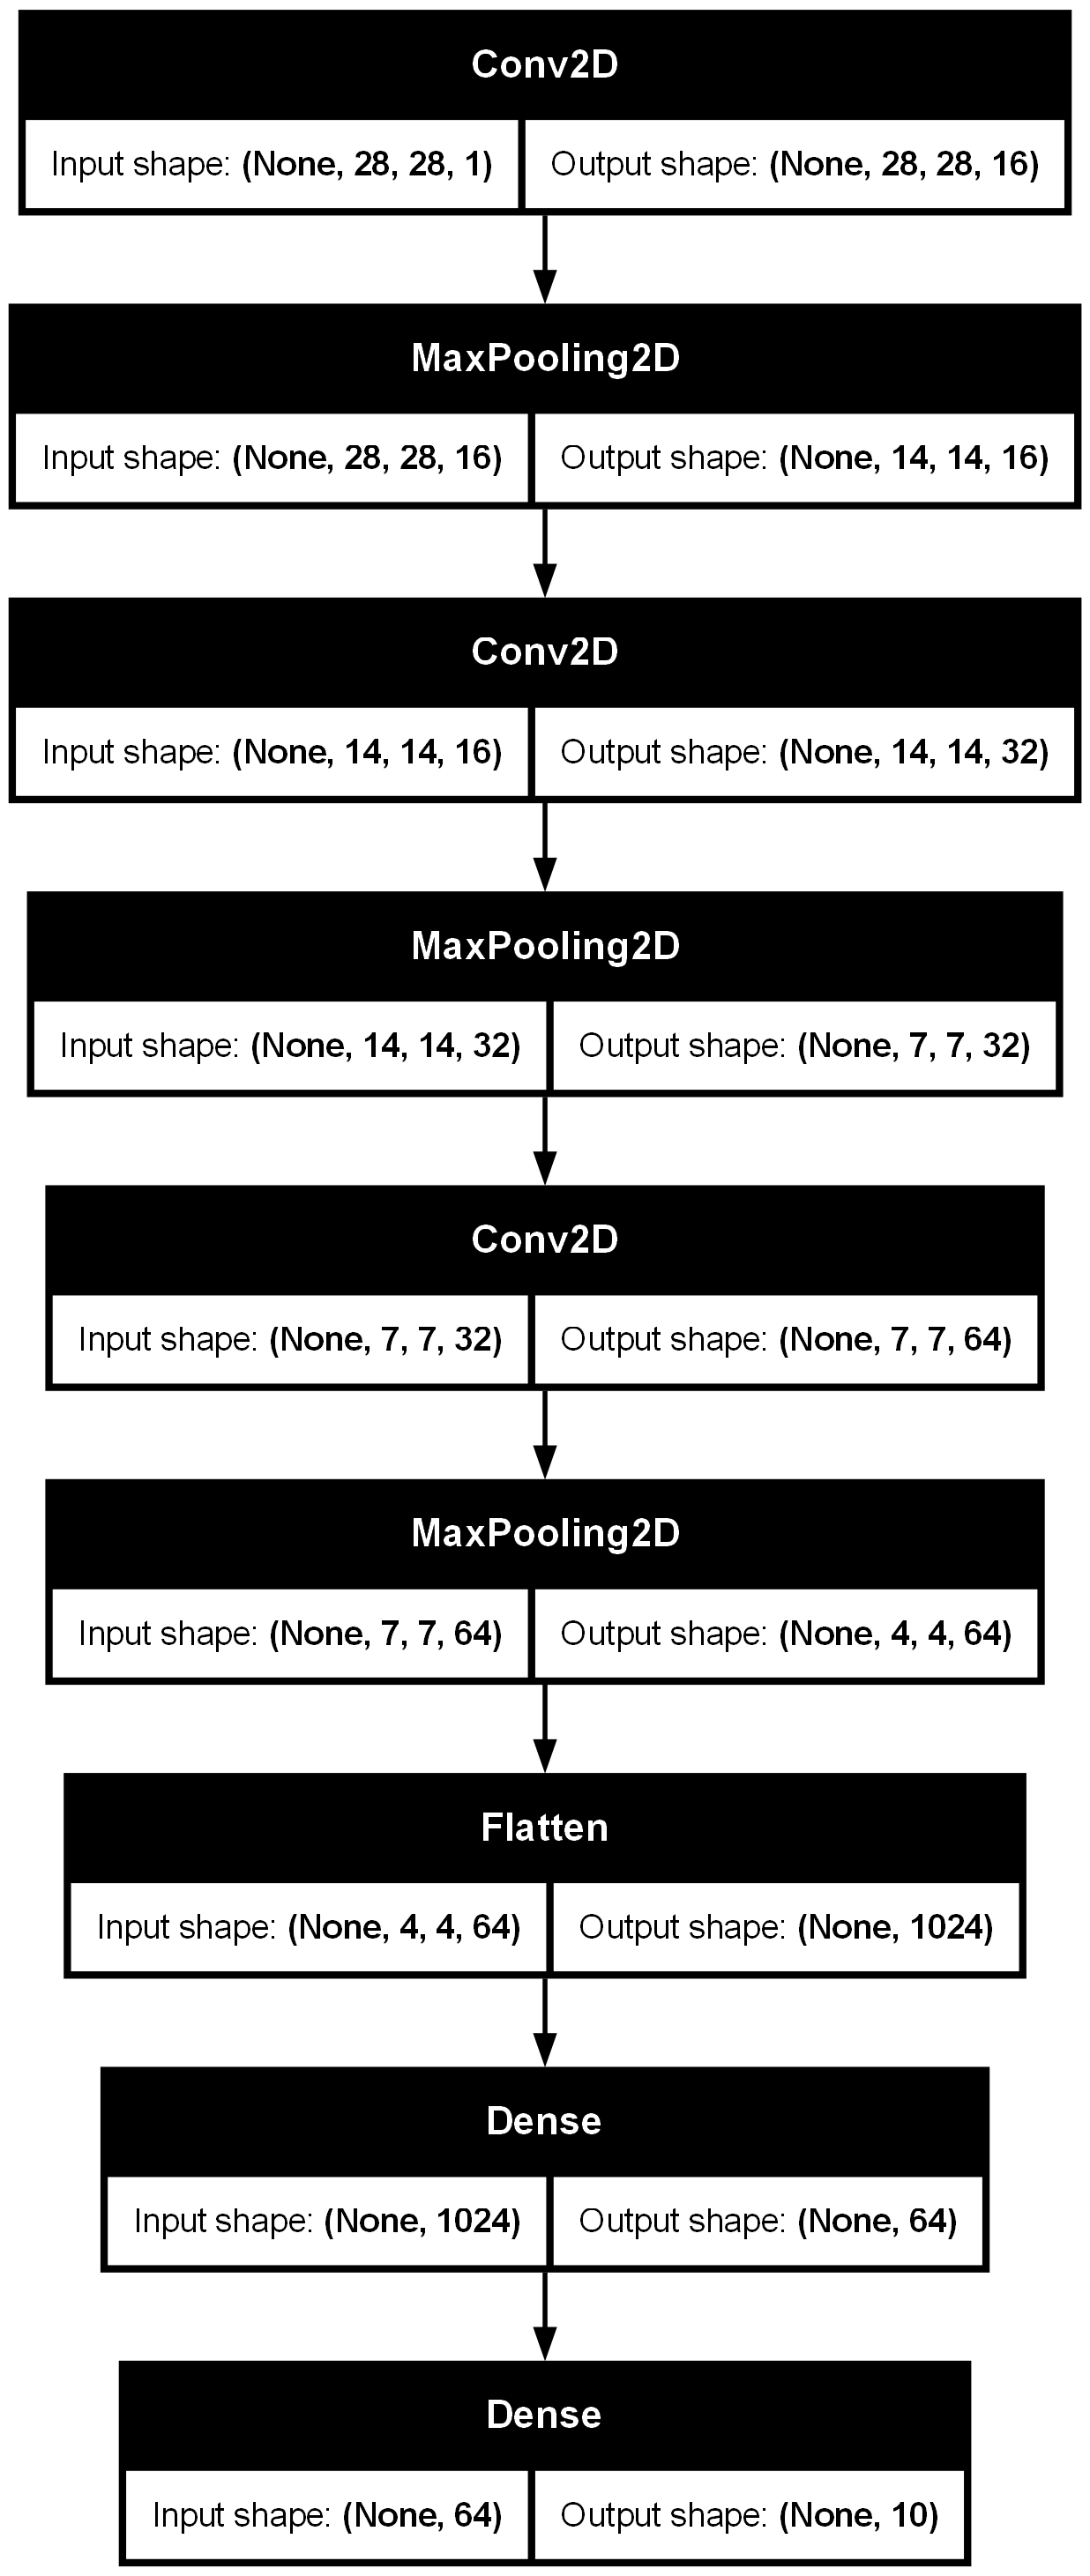

In [5]:
# plot_model() 함수 사용하기

# 6번 각주의 해결 방법을 써도 문제가 해결되지 않는다면,
# (conda install pydot
# conda install graphviz)
# 다음 코드의 주석을 풀어 실행시키세요
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz1.38/bin'051_fashin_mnist.ipynb

from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes=True)